In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

FILENAME="production.csv"
df=pd.read_csv(FILENAME,sep=',')
df.head(10)

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1.0,1,1,103.0,0.0,harpy.co
1,1.0,1,2,0.0,2.0,harpy.co
2,1.0,1,3,0.0,4.0,harpy.co
3,1.0,1,4,0.0,5.0,harpy.co
4,1.0,1,5,0.0,13.0,harpy.co
5,1.0,1,6,0.0,11.0,harpy.co
6,1.0,1,7,0.0,11.0,harpy.co
7,1.0,2,2,105.0,0.0,harpy.co
8,1.0,2,3,0.0,2.0,harpy.co
9,1.0,2,4,0.0,2.0,harpy.co


In [58]:
def all_period(df):
    df_supplier=df.groupby('supplier')
    df_westeros_inc=df_supplier.get_group('westeros.inc')
    westeros_prod=df_westeros_inc['produced'].sum()
    westeros_defects=df_westeros_inc['defects'].sum()
    df_harpy_co=df_supplier.get_group('harpy.co')
    harpy_prod=df_harpy_co['produced'].sum()
    harpy_defects=df_harpy_co['defects'].sum()
    
    cat_par = ['All period']
    width = 0.3
    x = np.arange(len(cat_par))
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, harpy_prod, width, label='Harpy')
    rects2 = ax.bar(x + width/2, westeros_prod, width, label='Westeros')
    ax.set_title('Произведено всего товара')
    ax.set_xticks(x)
    ax.set_xticklabels(cat_par)
    ax.legend()
    plt.show()
    print("Westeros.inc production=",westeros_prod)
    print("Harpy.co production=",harpy_prod)
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, harpy_defects, width, label='Harpy')
    rects2 = ax.bar(x + width/2, westeros_defects, width, label='Westeros')
    ax.set_title('Всего дефектов товара')
    ax.set_xticks(x)
    ax.set_xticklabels(cat_par)
    ax.legend()
    plt.show()      
    print("Westeros.inc defects=",westeros_defects)
    print("Harpy.co defects=",harpy_defects)
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, harpy_defects/harpy_prod, width, label='Harpy')
    rects2 = ax.bar(x + width/2, westeros_defects/westeros_prod, width, label='Westeros')
    ax.set_title('Отношение дефектов к произведенным товарам')
    ax.set_xticks(x)
    ax.set_xticklabels(cat_par)
    plt.show()
    print("Westeros.inc defects/production=",westeros_defects/westeros_prod)
    print("Harpy.co defects/production=",harpy_defects/harpy_prod)


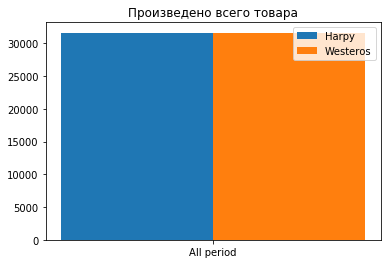

Westeros.inc production= 31625.0
Harpy.co production= 31532.0


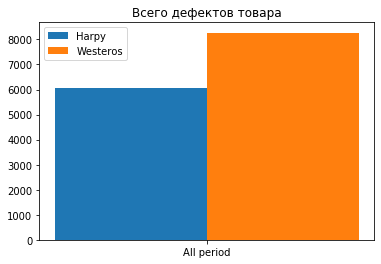

Westeros.inc defects= 8269.0
Harpy.co defects= 6080.0


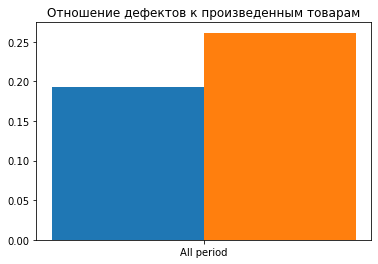

Westeros.inc defects/production= 0.2614703557312253
Harpy.co defects/production= 0.19281999238868452


In [59]:
all_period(copy.deepcopy(df))

In [68]:
def every_month(df):
    df_supplier=df.groupby('supplier')
    df_westeros_inc=df_supplier.get_group('westeros.inc')
    df_harpy_co=df_supplier.get_group('harpy.co')
    westeros_months=df_westeros_inc.groupby('production.date')
    westeros_sum_prod=[0,0,0,0,0,0]
    westeros_sum_def=[0,0,0,0,0,0]
    for i in range(6):
        westeros_m=westeros_months.get_group(i+1)
        westeros_sum_prod[i]=westeros_m['produced'].sum()
        westeros_sum_def[i]=westeros_m['defects'].sum()
    harpy_months=df_harpy_co.groupby('production.date')
    harpy_sum_prod=[0,0,0,0,0,0]
    harpy_sum_def=[0,0,0,0,0,0]
    print("Harpy co")
    for i in range(6):
        harpy_m=harpy_months.get_group(i+1)
        harpy_sum_prod[i]=harpy_m['produced'].sum()
        harpy_sum_def[i]=harpy_m['defects'].sum()
    harpy_percent=[0,0,0,0,0,0]
    westeros_percent=[0,0,0,0,0,0]
    for i in range(6):
        harpy_percent[i]=harpy_sum_def[i]/harpy_sum_prod[i]*100
        westeros_percent[i]=westeros_sum_def[i]/westeros_sum_prod[i]*100
    

    cat_par = ['Month №1','Month №2','Month №3','Month №4','Month №5','Month №6']
    width = 0.3
    x = np.arange(len(cat_par))
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, harpy_sum_prod, width, label='Harpy')
    rects2 = ax.bar(x + width/2, westeros_sum_prod, width, label='Westeros')
    ax.set_title('Производство товара по месяцам')
    ax.set_xticks(x)
    ax.set_xticklabels(cat_par)
    ax.legend()
    plt.show()
    for i in range(6):
        print("Month №",i+1," Harpy",harpy_sum_prod[i]," Westeros",westeros_sum_prod[i])
        

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, harpy_sum_def, width, label='Harpy')
    rects2 = ax.bar(x + width/2, westeros_sum_def, width, label='Westeros')
    ax.set_title('Дефекты товара по месяцам')
    ax.set_xticks(x)
    ax.set_xticklabels(cat_par)
    ax.legend()
    plt.show()
    for i in range(6):
        print("Month №",i+1," Harpy:",harpy_sum_def[i]," Westeros:",westeros_sum_def[i])
        
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, harpy_percent, width, label='Harpy')
    rects2 = ax.bar(x + width/2, westeros_percent, width, label='Westeros')
    ax.set_title('Качество продукции по месяцам')
    ax.set_xticks(x)
    ax.set_xticklabels(cat_par)
    ax.legend()
    plt.show()
    for i in range(6):
        print("Month №",i+1," Harpy:",harpy_percent[i]," Westeros:",westeros_percent[i])


Harpy co


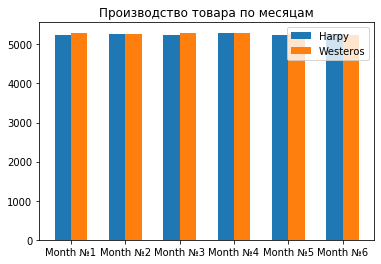

Month № 1  Harpy 5248.0  Westeros 5280.0
Month № 2  Harpy 5256.0  Westeros 5272.0
Month № 3  Harpy 5243.0  Westeros 5298.0
Month № 4  Harpy 5282.0  Westeros 5285.0
Month № 5  Harpy 5243.0  Westeros 5263.0
Month № 6  Harpy 5260.0  Westeros 5227.0


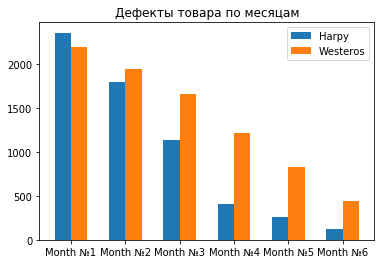

Month № 1  Harpy: 2355.0  Westeros: 2187.0
Month № 2  Harpy: 1798.0  Westeros: 1945.0
Month № 3  Harpy: 1134.0  Westeros: 1657.0
Month № 4  Harpy: 408.0  Westeros: 1211.0
Month № 5  Harpy: 258.0  Westeros: 832.0
Month № 6  Harpy: 127.0  Westeros: 437.0


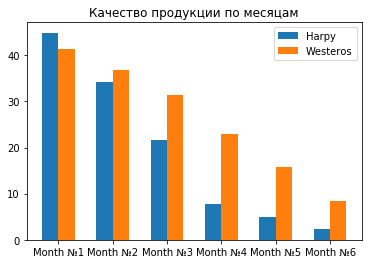

Month № 1  Harpy: 44.87423780487805  Westeros: 41.42045454545455
Month № 2  Harpy: 34.208523592085236  Westeros: 36.89301972685888
Month № 3  Harpy: 21.628838451268358  Westeros: 31.275953189882976
Month № 4  Harpy: 7.7243468383188185  Westeros: 22.91390728476821
Month № 5  Harpy: 4.920846843410262  Westeros: 15.808474254227628
Month № 6  Harpy: 2.414448669201521  Westeros: 8.360436196671131


In [69]:
every_month(copy.deepcopy(df))

In [74]:
def density_damage(df):
    df = df.drop(['report.date', 'unsullen.id'], axis=1)
    df = df.groupby(['supplier', 'production.date'], as_index=False).sum()
    df['defects'] = df['defects']/df['produced']/(7 - df['production.date'])*100
    fig = plt.figure(figsize=(10, 5)).add_subplot(111)
    for i in df.supplier.unique():
        sub_table = df.loc[df['supplier'] == i]
        fig.plot(sub_table['production.date'], sub_table.defects, label = i)
    fig.legend(borderaxespad=0.1, title = 'Плотность поломок в месяц')
    plt.show()

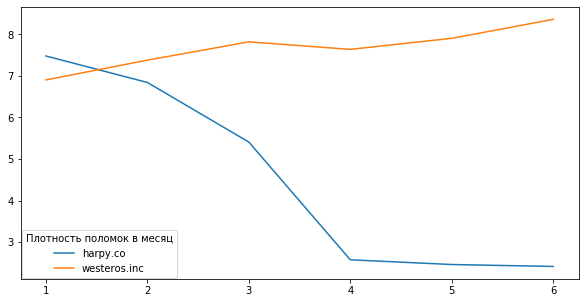

In [75]:
density_damage(copy.deepcopy(df))

In [84]:

def mean_after_month(df):
    df['report.date'] -= df['production.date']
    df = df.rename(columns={'report.date': 'time_to_death'})
    df = df.drop(['unsullen.id', 'produced'], axis=1)
    df = df.groupby(['production.date', 'supplier', 'time_to_death'], as_index=False).sum()
    df = df.drop(['production.date'], axis=1)
    df = df.groupby(['supplier', 'time_to_death'], as_index=False).mean()
    
    fig = plt.figure(figsize=(10, 5)).add_subplot(111)
    for i in df.supplier.unique():
        sub_table = df.loc[df['supplier'] == i]
        fig.plot(sub_table.time_to_death, sub_table.defects, label = i)
    fig.legend(borderaxespad=0.1, title = 'Среднее количество поломок в месяц')
    plt.show()
    print(df.head(10))

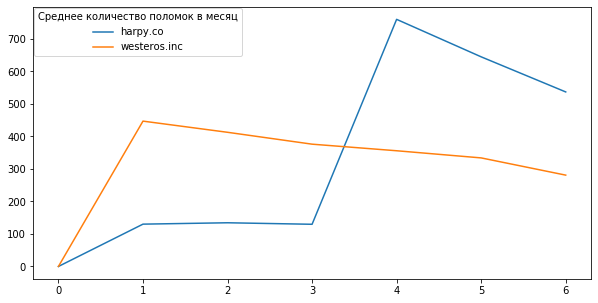

       supplier  time_to_death     defects
0      harpy.co              0    0.000000
1      harpy.co              1  130.166667
2      harpy.co              2  134.400000
3      harpy.co              3  129.750000
4      harpy.co              4  760.333333
5      harpy.co              5  645.000000
6      harpy.co              6  537.000000
7  westeros.inc              0    0.000000
8  westeros.inc              1  447.166667
9  westeros.inc              2  412.800000


In [85]:
mean_after_month(copy.deepcopy(df))